**Wod Embedding: kelimeleri, genellikle sürekli bir vektör uzayında anlamlı sayısal vektörlere dönüştürür.(Kelimenin anlamını bir vektörün içine "gömüyoruz")**

**Bu temsiller, kelimeler arasında anlamsal ve dilbilgisel ilişkileri yakalamayı hedefler. Birbirine dilbilgisel veya anlamsal olarak yakın kelimeler, vektör uzayında birbirine yakın çıkar.**

* Anlamsal Benzerlik
· Örneğin, "king" ve "queen" kelimeleri benzer vektörler alabilir.
* Matematiksel İşlemler
· Örneğin, "king" - "man" + "woman" = "queen" hesaplaması yapılabilir.

**Word Embeddings Modelleri**
* Word2Vec: Google tarafından geliştirilen, kelimeleri vektörlere dönüştüren ve bu vektörleri dildeki
ilişkileri yakalayacak şekilde eğiten bir modeldir.
* GloVe (Global Vectors for Word Representation): Stanford Üniversitesi tarafından geliştirilen, kelime
gömme temsillerini kelime ortaklıklarını yakalayacak şekilde hesaplayan bir modeldir.
* FastText: Facebook tarafından geliştirilen ve kelime gömme temsillerini kelime alt-birimlerini de
dikkate alarak hesaplayan bir modeldir.

In [ ]:
# word2vec (google)
# fasttext (meta)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

**Not:** *PCA: principle component analysis, verideki boyutları azaltarak önemli bilgileri koruyup yeni özellik seti oluşturur.metinleri vektörlerle temsil ediyorduk, bu vektörlerin boyutları olacak,50 boyutlu bir vektörü görselleştiremeyiz, max 5,6 boyutluları
görselleştirebiliriz(renk ve size eklersek). Bu yüzden PCA ile dimension reduction yapıyoruz*

In [ ]:
from gensim.models import Word2Vec , FastText
from gensim.utils import simple_preprocess
from gensim.models import KeyedVectors

In [ ]:
sentences = ["Artificial intelligence is widely used in factory automation.",
             "Machine learning improves workplace safety by analyzing data.",
             "Deep learning models can detect safety violations in factories.",
             "Data analysis helps optimize industrial processes and reduce risks.",
             "Network latency affects real-time monitoring in smart factories."]

In [ ]:
'''simple_preprocess, verilen cümleyi ön işleme tabi tutarak tokenize eder
   Küçük harfe çevirme, noktalama işaretlerini kaldırma gibi işlemleri de otomatik olarak yapar.'''
tokenized_sentences = [simple_preprocess(sentence) for sentence in sentences]
for token in tokenized_sentences:
  print(token)

['artificial', 'intelligence', 'is', 'widely', 'used', 'in', 'factory', 'automation']
['machine', 'learning', 'improves', 'workplace', 'safety', 'by', 'analyzing', 'data']
['deep', 'learning', 'models', 'can', 'detect', 'safety', 'violations', 'in', 'factories']
['data', 'analysis', 'helps', 'optimize', 'industrial', 'processes', 'and', 'reduce', 'risks']
['network', 'latency', 'affects', 'real', 'time', 'monitoring', 'in', 'smart', 'factories']


In [ ]:
# word2vec
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=50, window=5, min_count=1, sg=0)
'''
sentences: Tokenize edilmiş cümleler.
vector_size=50: Kelime vektörlerinin uzunluğu 50 olacak.
window=5: Her kelime için 5 kelime çevresi dikkate alınacak.
min_count=1: Eğitim verisinde bir kez bile geçen her kelime dikkate alınacak.
sg=0: CBOW modelini kullanır.
sg=1: Skip-gram modelini kullanır.
'''

In [ ]:
# fasttext
fasttext_model = FastText(sentences=tokenized_sentences, vector_size=50, window=5, min_count=1)

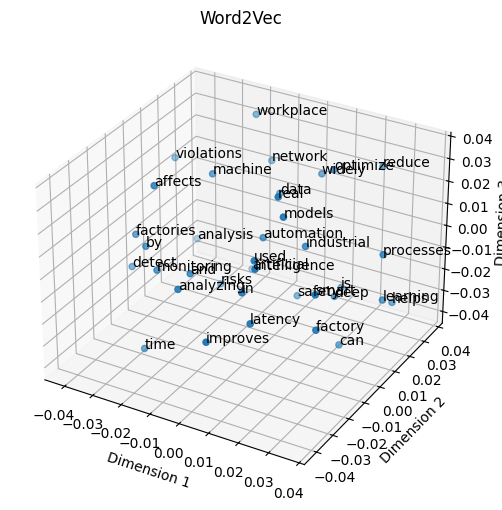

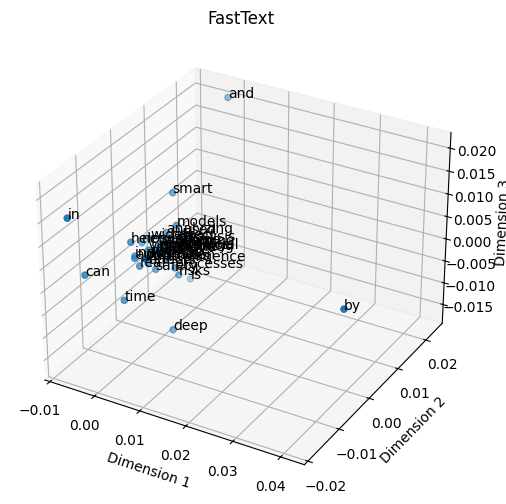

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_word_embedding(model, title):
    word_vector = model.wv # Word2Vec modelinin vektörlerini alıyoruz

    words = list(word_vector.index_to_key)[:1000]

    vectors = [word_vector[word] for word in words]

    pca = PCA(n_components=3) # 50 boyutlu kelime vektörlerini 3 boyutlu hale indiriyoruz
    reduced_vectors = pca.fit_transform(vectors)

    # 3D visualization
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2])  # 3D scatter plot

    for i, word in enumerate(words):
        ax.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], word)

    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    ax.set_zlabel('Dimension 3')  # 3D z-label ekleniyor
    plt.show()

plot_word_embedding(word2vec_model, 'Word2Vec')  # Word2Vec modeli
plot_word_embedding(fasttext_model, 'FastText')  # FastText modeli


In [ ]:
'''
NOT: Kelimeleri sayılarla gösteriyoruz (kelime vektörleri).
Word2Vec ve FastText modellerini, kelimeleri vektörlere çevirmek için kullandık
Her kelimenin anlamını taşıyan 50 sayı var. Biz bu 50 boyutlu vektörleri
3 boyuta indiriyoruz, böylece grafik üzerinde gösterebiliriz.
Bu 50 sayıyı 3 sayıya indiriyoruz, böylece grafik çizip görebiliyoruz.
Kelimeler arası ilişkileri görselleştirmek için vektörleri küçültüyoruz.

Örn: elma  →  [0.2, 0.8, 0.5, 0.1, ..., 0.6]  (50 sayı)
     armut →  [0.3, 0.7, 0.6, 0.2, ..., 0.5]  (50 sayı)
     masa  →  [0.9, 0.1, 0.2, 0.8, ..., 0.3]  (50 sayı)
Burada 50 tane sayıdan oluşan bir liste var. Bu liste, kelimenin anlamını temsil ediyor.
"Elma" ve "armut" benzer meyveler olduğu için vektörleri de birbirine benzeyecek.
"Masa" ise farklı bir şey olduğu için, sayıları da çok farklı olacak


=> encoding (kodlama): Vectorization: "Elma" = 1, "Elma" = 0 var ya da yok
   embedding: "Elma" = [0.2, 0.8, 0.5, ..., 0.6] Kelimenin anlamını sayılarla göstermek.
'''

In [ ]:
'''
Word2Vec ve FastText modelleri Anlamı Nasıl Öğreniyor?
1. Başlangıçta	Kelimelere rastgele sayılar atanıyor.
2. Eğitim Sürecinde	Model kelimelerin çevresindeki kelimelere bakarak anlam öğreniyor.
3. Sonuçta	Benzer kelimeler benzer vektörlere sahip oluyor.
  ✔ "Elma" ve "Armut" yaklaşıyor çünkü aynı bağlamda kullanılıyor.
  ✔ "Priz" kelimesi "elektrik" ve "şarj" ile yakınlaşıyor çünkü onlarla birlikte kullanılıyor.
Yani model KENDİSİ öğreniyor, sayıları uydurmuyor! 🔥🚀


Eğer "priz" kelimesi eğitim verisinde varsa, model onu çevresindeki kelimelere bakarak öğrenir.

Örneğin, eğitim verimizde şu cümleler varsa:

1. Priz duvara monte edilir.
2. Şarj aleti prizin içine takılır.
3. Prizler elektrik akımını iletir.

👉 Model "Priz" kelimesinin "şarj", "elektrik", "duvar" gibi kelimelerle sık geçtiğini fark eder ve ona uygun bir vektör oluşturur.
Yani priz kelimesi, "şarj" ve "elektrik" gibi kelimelere yakın bir sayısal temsil alır!

📌 Ama eğer "priz" kelimesi eğitim verisinde yoksa?

Model onu bilemez!
Yeni kelimeler için FastText gibi daha gelişmiş modeller lazım! (FastText parçalarına ayırarak tahmin yapar)
'''